In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('train.csv')

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

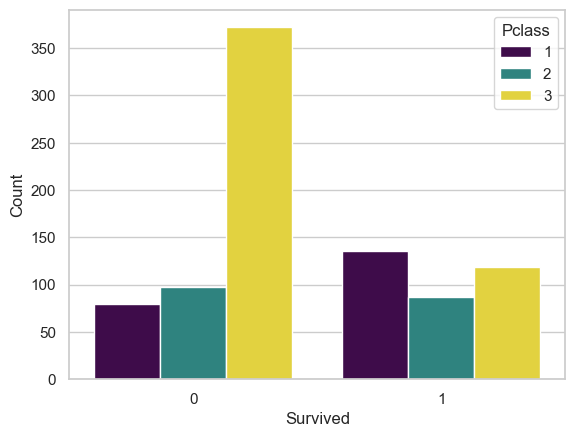

In [41]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')

# Display the plot
plt.show()

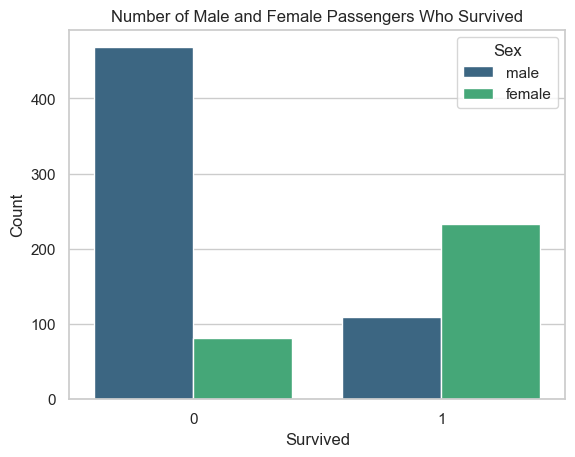

In [42]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Number of Male and Female Passengers Who Survived')

# Display the plot
plt.show()

In [51]:
# Define age groups
age_bins = [0,8, 18, 30, 50, 100]
age_labels = ['0-8','9-18', '19-30', '31-50', '51+']

# Create a new column 'AgeGroup' based on the defined bins and labels
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,19-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,19-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-50
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-50


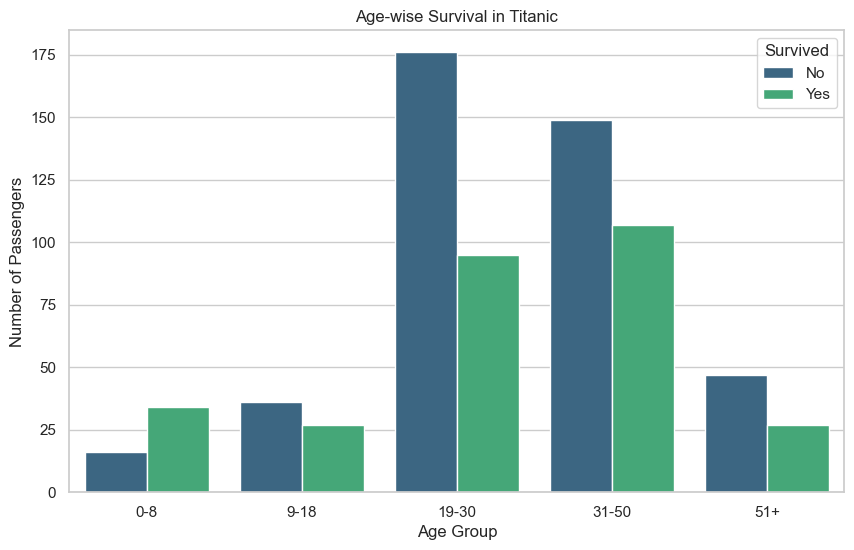

In [45]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
age_survival_plot = sns.countplot(x='AgeGroup', hue='Survived', data=df, palette='viridis')

# Set plot labels and title
age_survival_plot.set_title('Age-wise Survival in Titanic')
age_survival_plot.set_xlabel('Age Group')
age_survival_plot.set_ylabel('Number of Passengers')

# Display the legend
plt.legend(title='Survived', labels=['No', 'Yes'])

# Show the plot
plt.show()


In [52]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','AgeGroup'],inplace=True,axis=1)

In [53]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [65]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [66]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [67]:
X.Age = X.Age.fillna(X.Age.mean())

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [75]:
len(X_train)

712

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
model = GaussianNB()

In [78]:
model.fit(X_train,y_train)

GaussianNB()

In [87]:
model.score(X_test,y_test)

0.8100558659217877